In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set()
sns.light_palette((210, 90, 60), input="husl")
sns.set_style('white')


In [54]:
df= pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data.csv')
df.head()

/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/03,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
1,2020/05/27,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,Missing,No,Missing
2,2020/06/06,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
3,2020/06/28,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
4,2020/07/06,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668175 entries, 0 to 2668174
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 223.9+ MB


In [56]:
df.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,2668175,993444,1247610,2668175,2668156,2668094,2668168,2668175,2668175,2668175,2668175
unique,157,174,212,2,5,10,8,4,4,4,4
top,2020/07/06,2020/04/06,2020/04/01,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
freq,156669,17826,16268,2552919,1342585,468471,1254212,991705,1604344,1188259,1614971


In [57]:
# What are the two unique current_status values? 
print(df.current_status.unique())
print('\n')
print(df.current_status.value_counts())

['Laboratory-confirmed case' 'Probable Case']


Laboratory-confirmed case    2552919
Probable Case                 115256
Name: current_status, dtype: int64


In [58]:
# What are the 5 unique values in sex? 
print(df.sex.value_counts())

Female     1342585
Male       1266997
Missing      31730
Unknown      26760
Other           84
Name: sex, dtype: int64


In [59]:
# What are the different age groups? 
print(df.age_group.value_counts())

20 - 29 Years    468471
30 - 39 Years    450637
40 - 49 Years    428478
50 - 59 Years    427865
60 - 69 Years    307648
80+ Years        177459
70 - 79 Years    175515
10 - 19 Years    161352
0 - 9 Years       67700
Unknown            2969
Name: age_group, dtype: int64


In [60]:
# what are the unique values for hosp_yn, icu_yn, death_yn, medcon_yn
segment= df.iloc[:,-4:]
for column in list(segment.columns): 
    print(column)
    print(segment[column].value_counts())
    print('\n')

hosp_yn
No         991705
Missing    767653
Unknown    628349
Yes        280468
Name: hosp_yn, dtype: int64


icu_yn
Missing    1604344
Unknown     740458
No          282466
Yes          40907
Name: icu_yn, dtype: int64


death_yn
No         1188259
Missing     813198
Unknown     553524
Yes         113194
Name: death_yn, dtype: int64


medcond_yn
Missing    1614971
Unknown     465752
Yes         386032
No          201420
Name: medcond_yn, dtype: int64




In [61]:
# It looks like missing values are either list as 'Missing' or 'Unknown'
#We will convert all those values to NaN for ease of use
df.replace(to_replace=['Missing', 'Unknown'], value= np.nan, inplace= True)
df.head(10)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/03,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",NaN,NaN,NaN,NaN
1,2020/05/27,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,NaN,No,NaN
2,2020/06/06,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",NaN,NaN,NaN,NaN
3,2020/06/28,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",NaN,NaN,NaN,NaN
4,2020/07/06,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",NaN,NaN,NaN,NaN
5,2020/06/01,NaN,2020/05/23,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,NaN,No,NaN
6,2020/06/17,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",NaN,NaN,NaN,NaN
7,2020/07/08,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",NaN,NaN,NaN,NaN
8,2020/06/15,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",NaN,NaN,NaN,NaN
9,2020/06/01,NaN,2020/05/26,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,NaN,No,NaN


In [62]:
# To be conservative we are going to make the rather significant assumption that is there is an Nan value in the hosp, icu, death or medcon
# then that will be a no.

df[['hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']]= df[['hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']].replace(to_replace= np.nan, value= 'No')
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/03,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
1,2020/05/27,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
2,2020/06/06,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
3,2020/06/28,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
4,2020/07/06,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No


In [63]:
segment= df[['hosp_yn', 'icu_yn', 'death_yn']]
print(segment.hosp_yn.value_counts())
segment.hosp_yn.value_counts()[0]

No     2387707
Yes     280468
Name: hosp_yn, dtype: int64


2387707

In [98]:
values= [segment.hosp_yn.value_counts()[0]]
for column in list(segment.columns):
    x= segment[column].value_counts()[1]
    values.append(x)
values

[2387707, 280468, 40907, 113194]

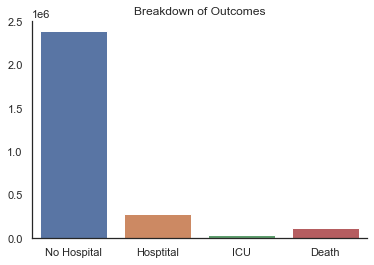

In [99]:
sns.barplot(x= ['No Hospital', 'Hosptital', 'ICU', 'Death'], y= values)
plt.title('Breakdown of Outcomes')
sns.despine()

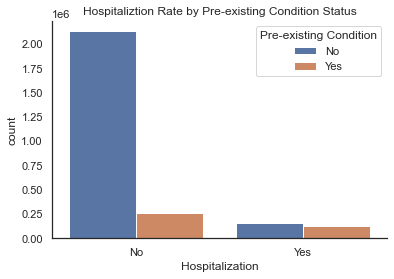

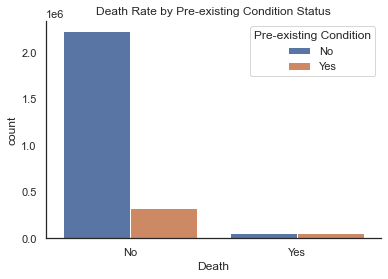

In [131]:
# Hospitalization broken down by pre existing condition
sns.countplot(x=df.hosp_yn, hue= df.medcond_yn, data= df)
plt.title('Hospitaliztion Rate by Pre-existing Condition Status')
plt.xlabel('Hospitalization')
plt.legend(title= 'Pre-existing Condition')
sns.despine()
plt.savefig('pre-existing_2.png')
plt.show()

sns.countplot(x=df.death_yn, hue= df.medcond_yn, data= df)
plt.title('Death Rate by Pre-existing Condition Status')
plt.xlabel('Death')
plt.legend(title= 'Pre-existing Condition')
sns.despine()
plt.savefig('pre-existing_3.png')
plt.show()

### Judging from this graph we can see that the bulk of people who were hospitalized did have a pre existing condition and the bulk of people who died did have a pre existing condition

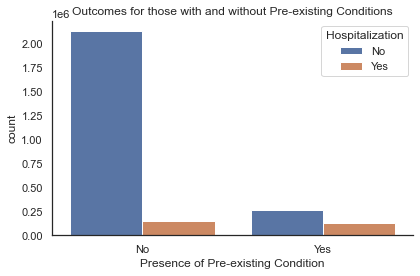

In [130]:
# What did the outcomes look like for this with and without the pre existing condition
sns.countplot(x=df.medcond_yn, hue=df.hosp_yn, data=df)
plt.title('Outcomes for those with and without Pre-existing Conditions')
plt.legend(title= 'Hospitalization')
plt.xlabel('Presence of Pre-existing Condition')
sns.despine()
plt.tight_layout()
plt.savefig('Pre-existing.png')


### A significant portion of people with pre existing conditions ended up in the hospital while most peope without a pre-existing condition did not end up in the hospital 

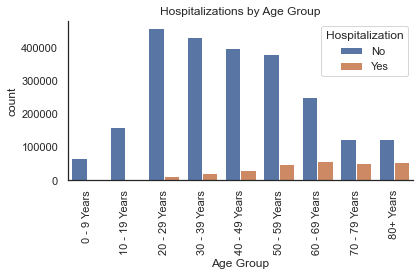

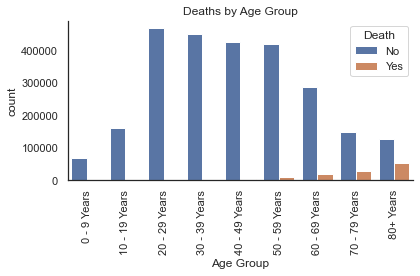

In [133]:
# Beak hospitalizations by age group
sns.countplot(x= df.age_group, hue= df.hosp_yn, data=df)
plt.title('Hospitalizations by Age Group')
plt.legend(title='Hospitalization')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
sns.despine()
plt.tight_layout()
plt.savefig('Age_1.png')
plt.show()

# Break down of deaths by age group
# Beak hospitalizations by age group
sns.countplot(x= df.age_group, hue= df.death_yn, data=df)
plt.title('Deaths by Age Group')
plt.legend(title='Death')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
sns.despine()
plt.tight_layout()
plt.savefig('Age_2.png')


### The percentage of pateints hospitalized and the percentage of patients who die increases as age group increase

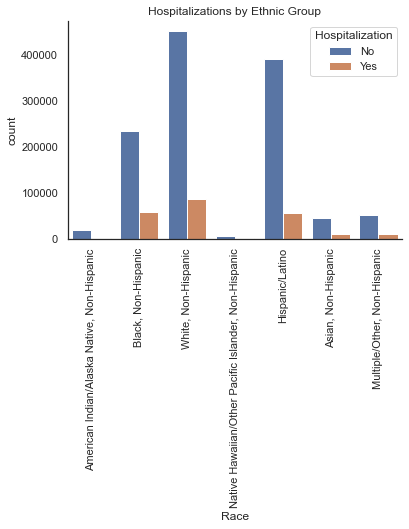

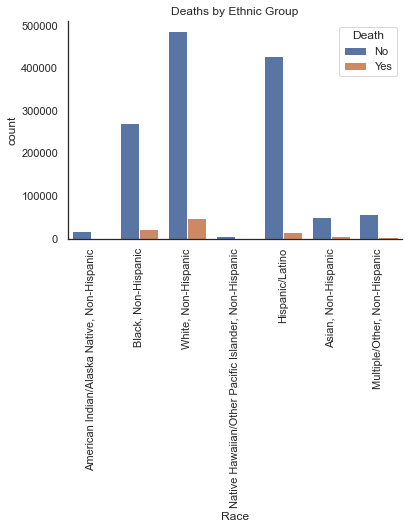

In [97]:

# Break hospitalizations by race
sns.countplot(x= df['Race and ethnicity (combined)'], hue= df.hosp_yn, data=df, orient='vertical')
plt.title('Hospitalizations by Ethnic Group')
plt.legend(title='Hospitalization')
plt.xlabel('Race')
plt.xticks(rotation=90)
sns.despine()
plt.show()

# Break down of deaths by race
sns.countplot(x= df['Race and ethnicity (combined)'], hue= df.death_yn, data=df)
plt.title('Deaths by Ethnic Group')
plt.legend(title='Death')
plt.xlabel('Race')
plt.xticks(rotation=90)
sns.despine()

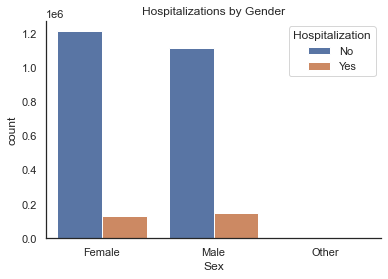

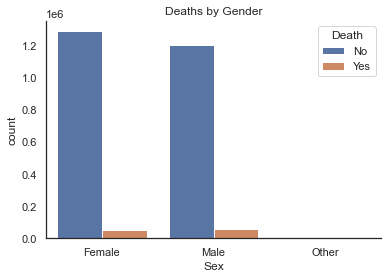

In [136]:
# Beak hospitalizations by age group
sns.countplot(x= df.sex, hue= df.hosp_yn, data=df)
plt.title('Hospitalizations by Gender')
plt.legend(title='Hospitalization')
plt.xlabel('Sex')
sns.despine()
plt.savefig('Gender_1.png')
plt.show()

# Break down of deaths by age group
# Beak hospitalizations by age group
sns.countplot(x= df.sex, hue= df.death_yn, data=df)
plt.title('Deaths by Gender')
plt.legend(title='Death')
plt.xlabel('Sex')
sns.despine()
plt.savefig('Gender_2.png')

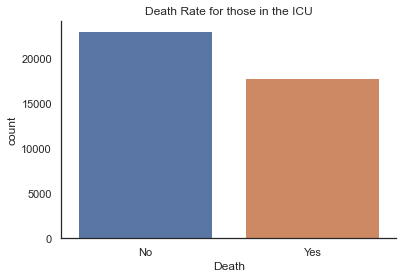

In [134]:
# Slice df to include only those in the icu 
icu= df[df['icu_yn']== 'Yes']
sns.countplot(x=icu.death_yn, data=icu)
plt.title('Death Rate for those in the ICU')
plt.xlabel('Death')
sns.despine()
plt.savefig('ICU_1.png')
plt.show()

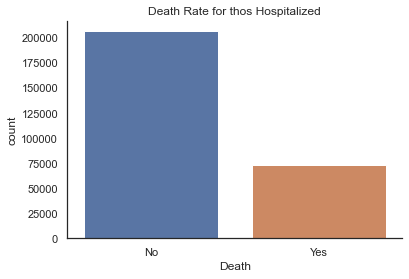

In [112]:
# Slice df down to those who were hospitalized
hosp= df[df['hosp_yn']=='Yes']
sns.countplot(x=hosp.death_yn, data= hosp)
plt.title('Death Rate for those Hospitalized')
plt.xlabel('Death')
sns.despine()

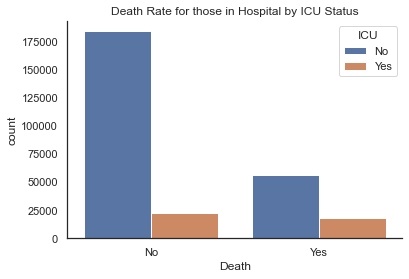

In [113]:
sns.countplot(x=hosp.death_yn, hue= hosp.icu_yn, data=hosp)
plt.title('Death Rate for those in Hospital by ICU Status')
plt.xlabel('Death')
plt.legend(title='ICU')
sns.despine()

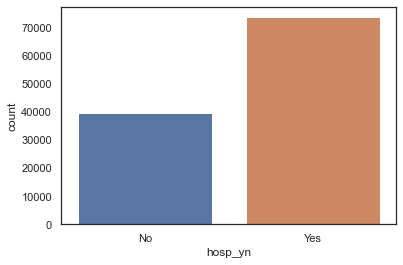

In [122]:
# Slice for those who died
death= df[df['death_yn']== 'Yes']
sns.countplot(x=death.hosp_yn, data=death)

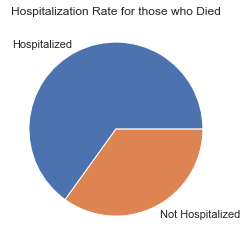

In [129]:
death.hosp_yn.value_counts()
plt.pie(x=death.hosp_yn.value_counts(), labels=['Hospitalized', 'Not Hospitalized'])
plt.title('Hospitalization Rate for those who Died')
plt.savefig('Hosp for those who died.png')